# Ordinary Differential Equations

**Nombre:** Heriberto Espino Montelongo

**Materia:** Análisis numérico

**Sección:** 1

**Fecha:** 24/10/2024

## Funciones

In [1]:
import matplotlib.pyplot as plt
import mpld3
from IPython.display import display, HTML

import numpy as np
import sympy as sp
from sympy.abc import x 

from matplotlib.backends.backend_pdf import PdfPages

from prettytable import PrettyTable

In [2]:
all_figures = []

In [3]:
def plot_solution(t, y, fig_title, color):

    global all_figures  # Use global to store figures across multiple calls

    fig = plt.figure(figsize=(8, 6), dpi=150) 
    plt.plot(t, y,'o', alpha=0.9, color=color)
    plt.title(fig_title, fontsize=14, fontweight='bold')
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('y')

    display(HTML(mpld3.fig_to_html(plt.gcf()))) # Display the plot as HTML
    plt.close() # Close the plot to prevent it from displaying twice

    all_figures.append(fig) # Store the figure to save it later
    
    return

In [4]:
def exact_solution(name, function, lower_bound, upper_bound, h, plot = False):

    f = sp.lambdify(x,function)
    n = int((upper_bound-lower_bound)/h)
    t = np.linspace(lower_bound,upper_bound,n+1)
    y = f(t)

    if plot:
        plot_solution(t, y, 'Heri - Exact Solution - ' + str(name), '#B65A5A')

    return t, y

In [5]:
def euler(name, f, t0, tn, h, y0, plot = False):

    n = int(abs(tn - t0) / h)
    t = np.linspace(t0, tn, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0
    for k in range(n):
        y[k + 1] = y[k] + h * f(t[k], y[k])

    if plot:
        plot_solution(t, y, 'Heri - Euler\'s method - ' + str(name), '#1A5465')

    return t, y

In [6]:
def RK4(name, f, t0, tn, h, y0, plot = False):

    n = int(abs(tn - t0) / h)
    t = np.linspace(t0, tn, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0
    
    for i in range(n):
        s1 = f(t[i], y[i])
        s2 = f(t[i] + h / 2, y[i] + s1 * h / 2)
        s3 = f(t[i] + h / 2, y[i] + s2 * h / 2)
        s4 = f(t[i] + h, y[i] + s3 * h)
        y[i + 1] = y[i] + h * (s1 + 2 * s2 + 2 * s3 + s4) / 6

    if plot:
        plot_solution(t, y, 'Heri - RK4 method - ' + str(name), '#1A5465')

    return t, y

In [7]:
def compare_methods(name, function, f, t0, tn, h, y0):

    t_exact, y_exact = exact_solution(name, function, t0, tn, h)
    t_euler, y_euler = euler(name, f, t0, tn, h, y0)
    t_rk4, y_rk4 = RK4(name, f, t0, tn, h, y0)

    global all_figures

    fig = plt.figure(figsize=(5, 3), dpi=150) 
    plt.plot(t_exact, y_exact, '-', label='Exact Solution', color='#50A3A4', alpha=0.5, lwd = 3)
    plt.plot(t_euler, y_euler, 's--', label='Euler\'s Method', color='#FCAF38', alpha=0.5)
    plt.plot(t_rk4, y_rk4, 'o--', label='RK4 Method', color='#F95335', alpha=0.5)
    plt.title('Heri - Comparison of Methods - ' + str(name), fontsize=14, fontweight='bold')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

    display(HTML(mpld3.fig_to_html(plt.gcf())))
    plt.close()

    all_figures.append(fig)
    
    return

In [8]:
def euler_vs_RK4(name, f, t0, tn, h, y0, plot = False, table = False, final_results = False):

    t_euler, y_euler = euler(name, f, t0, tn, h, y0)
    t_rk4, y_rk4 = RK4(name, f, t0, tn, h, y0)

    if table:
        myTable = PrettyTable(["x_i", "y_i Euler", "y_i RK4"])
        myTable.title = "Euler vs RK4 " + str(name)

        for i in range(len(t_euler)):
            myTable.add_row([
                round(t_euler[i], 2), 
                round(y_euler[i], 2), 
                round(y_rk4[i], 2), 
            ])

        display(HTML(myTable.get_html_string()))

    if plot:
        global all_figures

        fig = plt.figure(figsize=(5, 3), dpi=150) 
        plt.plot(t_euler, y_euler, 's-', label="Euler's Method", color='#1A5465', alpha=0.5)
        plt.plot(t_rk4, y_rk4, 'd-', label='RK4 Method', color='#2A9D8F', alpha=0.5)
        plt.title('Heri - Comparison of Methods - ' + str(name), fontsize=14, fontweight='bold')
        plt.xlabel('t')
        plt.ylabel('y')
        plt.legend()
        plt.grid()
        
        display(HTML(mpld3.fig_to_html(plt.gcf())))
        plt.close()

        all_figures.append(fig)

    if final_results:
        print(f'{name}\nEuler\'s Method: {y_euler[-1]}\nRK4 Method: {y_rk4[-1]}\n')

    return

In [9]:
def multipage(filename, figs=None, dpi=150):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]  # Fallback: get all open figures
    for fig in figs:
        # Save each figure with tight layout and specified dpi to control size
        fig.savefig(pp, format='pdf', dpi=dpi, bbox_inches='tight')
    pp.close()

In [10]:
def error_euler(name, f, function, t0, tn, h, y0):

    t_exact, y_exact = exact_solution(name, f, t0, tn, h)
    t_euler, y_euler = euler(name, function, t0, tn, h, y0)
    
    myTable = PrettyTable(["x_i", "y_i Exact", "y_i Euler", "Absolute E", "Relative E"])
    myTable.title = "Error Analysis for Euler  " + str(name)

    for i in range(len(t_exact)):
        myTable.add_row([
            round(t_exact[i], 2), 
            round(y_exact[i], 2), 
            round(y_euler[i], 2), 
            round(abs(y_exact[i] - y_euler[i]), 4), 
            round(abs(y_exact[i] - y_euler[i]) / y_exact[i], 4)
        ])

    display(HTML(myTable.get_html_string()))

In [11]:
def error_rk4(name, f, function, t0, tn, h, y0):

    t_exact, y_exact = exact_solution(name, f, t0, tn, h)
    t_rk4, y_rk4 = RK4(name, function, t0, tn, h, y0)

    myTable = PrettyTable(["x_i", "y_i Exact", "y_i RK4", "Absolute E", "Relative E"])
    myTable.title = "Error Analysis for RK4  " + str(name)

    for i in range(len(t_exact)):
        myTable.add_row([
            round(t_exact[i], 2), 
            round(y_exact[i], 2), 
            round(y_rk4[i], 2), 
            round(abs(y_exact[i] - y_rk4[i]), 4), 
            round(abs(y_exact[i] - y_rk4[i]) / y_rk4[i], 4)
        ])
        
    display(HTML(myTable.get_html_string()))

## Exercise 1

In [12]:
def function(x,y):   # parte derecha de la edo y'=f(x,y)
    return y

f = 'exp(x)'

t0 = 0
tn = 1
y0 = 1

### Exercise 1: $h = 0.10$

In [13]:
name = 'Exercise 1: h = 0.10'
h = 0.1

AttributeError: Line2D.set() got an unexpected keyword argument 'lwd'

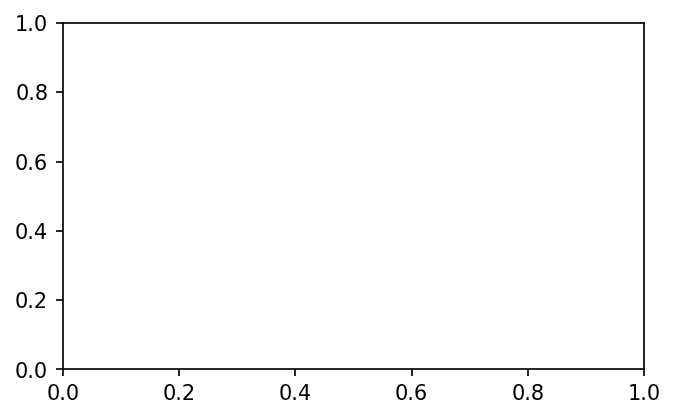

In [14]:
compare_methods(name, f, function, t0, tn, h, y0)

In [ ]:
error_euler(name, f, function, t0, tn, h, y0)

x_i,y_i Exact,y_i Euler,Absolute E,Relative E
0.0,1.0,1.0,0.0,0.0
0.1,1.11,1.1,0.0052,0.0047
0.2,1.22,1.21,0.0114,0.0093
0.3,1.35,1.33,0.0189,0.014
0.4,1.49,1.46,0.0277,0.0186
0.5,1.65,1.61,0.0382,0.0232
0.6,1.82,1.77,0.0506,0.0277
0.7,2.01,1.95,0.065,0.0323
0.8,2.23,2.14,0.082,0.0368
0.9,2.46,2.36,0.1017,0.0413


In [ ]:
error_rk4(name, f, function, t0, tn, h, y0)

x_i,y_i Exact,y_i RK4,Absolute E,Relative E
0.0,1.0,1.0,0.0,0.0
0.1,1.11,1.11,0.0,0.0
0.2,1.22,1.22,0.0,0.0
0.3,1.35,1.35,0.0,0.0
0.4,1.49,1.49,0.0,0.0
0.5,1.65,1.65,0.0,0.0
0.6,1.82,1.82,0.0,0.0
0.7,2.01,2.01,0.0,0.0
0.8,2.23,2.23,0.0,0.0
0.9,2.46,2.46,0.0,0.0


### Exercise 1: $h = 0.25$

In [ ]:
name = 'Exercise 1: h = 0.05'
h = 0.05

In [ ]:
compare_methods(name, f, function, t0, tn, h, y0)

In [ ]:
error_euler(name, f, function, t0, tn, h, y0)

x_i,y_i Exact,y_i Euler,Absolute E,Relative E
0.0,1.0,1.0,0.0,0.0
0.05,1.05,1.05,0.0013,0.0012
0.1,1.11,1.1,0.0027,0.0024
0.15,1.16,1.16,0.0042,0.0036
0.2,1.22,1.22,0.0059,0.0048
0.25,1.28,1.28,0.0077,0.006
0.3,1.35,1.34,0.0098,0.0072
0.35,1.42,1.41,0.012,0.0084
0.4,1.49,1.48,0.0144,0.0096
0.45,1.57,1.55,0.017,0.0108


In [ ]:
error_rk4(name, f, function, t0, tn, h, y0)

x_i,y_i Exact,y_i RK4,Absolute E,Relative E
0.0,1.0,1.0,0.0,0.0
0.05,1.05,1.05,0.0,0.0
0.1,1.11,1.11,0.0,0.0
0.15,1.16,1.16,0.0,0.0
0.2,1.22,1.22,0.0,0.0
0.25,1.28,1.28,0.0,0.0
0.3,1.35,1.35,0.0,0.0
0.35,1.42,1.42,0.0,0.0
0.4,1.49,1.49,0.0,0.0
0.45,1.57,1.57,0.0,0.0


## Exercise 2

In [ ]:
def function(x, y):
    return 2*np.cos(x)*y

t0 = 0
tn = 10
y0 = 1

### Exercise 2: $h = 0.25$

In [ ]:
name = 'Exercise 2: h = 0.25'
h = 0.25

euler_vs_RK4(name, function, t0, tn, h, y0)

### Exercise 2: $h = 0.10$

In [ ]:
name = 'Exercise 2: h = 0.10'
h = 0.10

euler_vs_RK4(name, function, t0, tn, h, y0)

### Exercise 2: $h = 0.05$

In [ ]:
name = 'Exercise 2: h = 0.05'
h = 0.05

euler_vs_RK4(name, function, t0, tn, h, y0)

## Exportar los plots

In [ ]:
multipage("Practica 4 de 6.pdf", figs=all_figures)